# Bike Sharing Demand

## Overwiew

자전거 공유 시스템은 도시 전역의 키오스크 위치 네트워크를 통해 멤버십, 렌트, 자전거 반환 과정을 자동화하는 자전거 대여 수단이다. 이러한 시스템을 사용하여, 사람들은 한 장소에서 자전거를 빌려서 필요에 따라 다른 장소로 돌려줄 수 있다. 현재, 전 세계에는 500개 이상의 자전거 공유 프로그램이 있다.
이러한 시스템에 의해 생성된 데이터는 여행 기간, 출발 위치, 도착 위치 및 경과된 시간을 명시적으로 기록하기 때문에 연구원들에게 매력적이다. 그러므로 자전거 공유 시스템은 도시의 이동성 연구에 사용될 수 있는 센서 네트워크로 기능한다. 이번 대회에서는 워싱턴 D.C.의 Capital Bikeshare 프로그램에서 자전거 대여 수요를 예측하기 위해 과거 사용 패턴과 날씨 데이터를 결합해야 한다.

## Evaluation

RMSLE(Root Mean Squared Logatic Error)

## Data

당신은 2년에 걸친 매시간 임대 데이터를 제공받는다. 시험 세트는 20일부터 이달 말까지입니다. 당신은 임대 기간 전에 이용할 수 있는 정보만 사용하여 시험 세트에서 다루는 매 시간 동안 임대된 자전거의 총 수를 예측해야 한다.

* datetime: 시간별날짜 + ㅌ
* season: 1. 봄 2. 여름 3. 가을 4. 겨울
* holiday: 그날이 휴일로 간주되는 날
* workingday: 휴일도 주말도 아닌날로 간주
* weather: 1. 맑음, 구름 조금, 부분적으로 흐림 2. 안개+흐림, 안개+비교적 많은 구름, 안개+구름 조금, 안개
3. 눈 약간, 약간 비+뇌우+흩어져 분포된 구름, 약간 비+흩어져 분포된 구름 4. 비 많음+얼음 알갱이+뇌우+안개, 눈+안개(흐릿)
* temp: 섭씨 온도
* atem: 체감 온도
* humidity: 상대습도
* windspeed: 풍속
* casua: 등록되지 않은 사용자 임대 횟수
* registered: 등록된 사용자 임대 횟수
* count: 총 임대 수

참고자료: https://www.kaggle.com/c/bike-sharing-demand/overview



In [4]:
# 평가방법은 RMSLE, 분류와 희귀중 회귀와 관련된 문제로 자건거 대여량을 예측하는 문제
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# 그래프를 그리기 위해
%matplotlib inline
# ggplot 스타일을 사용하여 격자로 숫자 범위가 잘 보이도록 함
plt.style.use('ggplot')
# 폰트가 꺠지는 문제 마이너스로 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
train = pd.read_csv("bike_sharing_demand_train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.temp.describe()
# 기온에 대해 정보보기

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [10]:
train.isnull().sum()
# null 데이터 있는지 확인하기

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

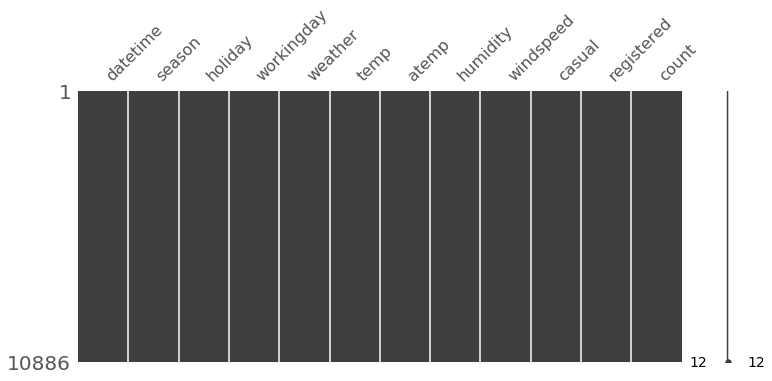

In [11]:
# null 데이터 시각화해보기
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [12]:
# 년, 월, 일, 시간, 분, 초로 분할해보고, 칼럼 수 확인하기
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

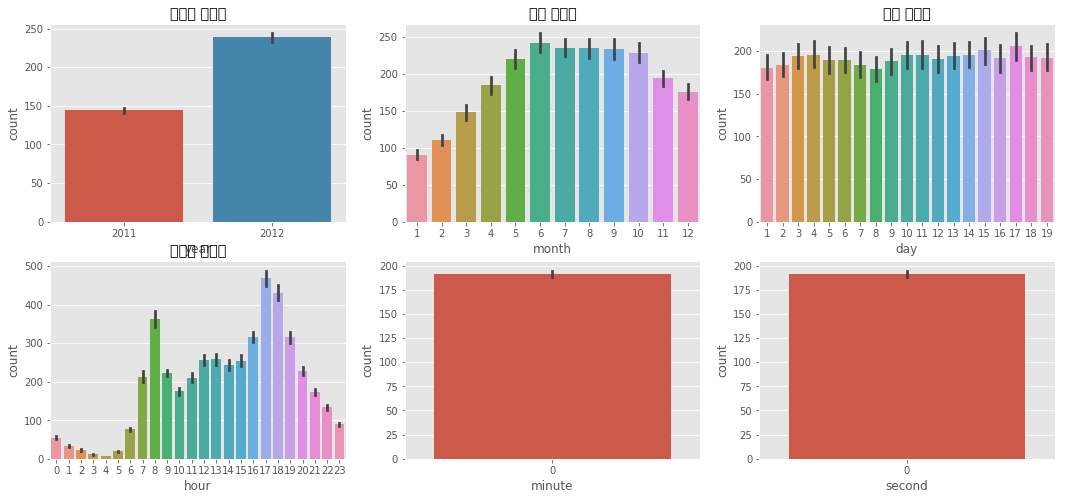

In [14]:
# 시간별 대여량 시각화해보기
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = 'count', title = "연도별 대여량")
ax2.set(xlabel = 'month', title = "월별 대여량")
ax3.set(xlabel = 'day', title = "일별 대여량")
ax4.set(xlabel = 'hour', title = "시간별 대여량")

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'working day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

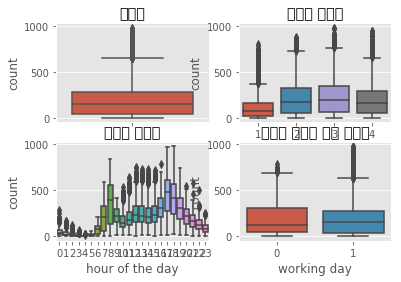

In [15]:
#
fig, axes = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(12, 10)

sns.boxplot(data = train, y = "count", orient = "v", ax = axes[0][0])
sns.boxplot(data = train, y = "count", x = "season", orient = "v",  ax = axes[0][1])
sns.boxplot(data = train, y = "count", x = "hour", orient = "v",  ax = axes[1][0])
sns.boxplot(data = train, y = "count", x = "workingday", orient = "v",  ax = axes[1][1])


axes[0][0].set(ylabel = 'count', title = "대여량")
axes[0][1].set(xlabel = 'season', ylabel = 'count', title = "계절별 대여량")
axes[1][0].set(xlabel = 'hour of the day', ylabel = 'count', title = "시간별 대여량")
axes[1][1].set(xlabel = 'working day', ylabel = 'count', title = "근무일 여부에 따른 대여량")

In [16]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [17]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

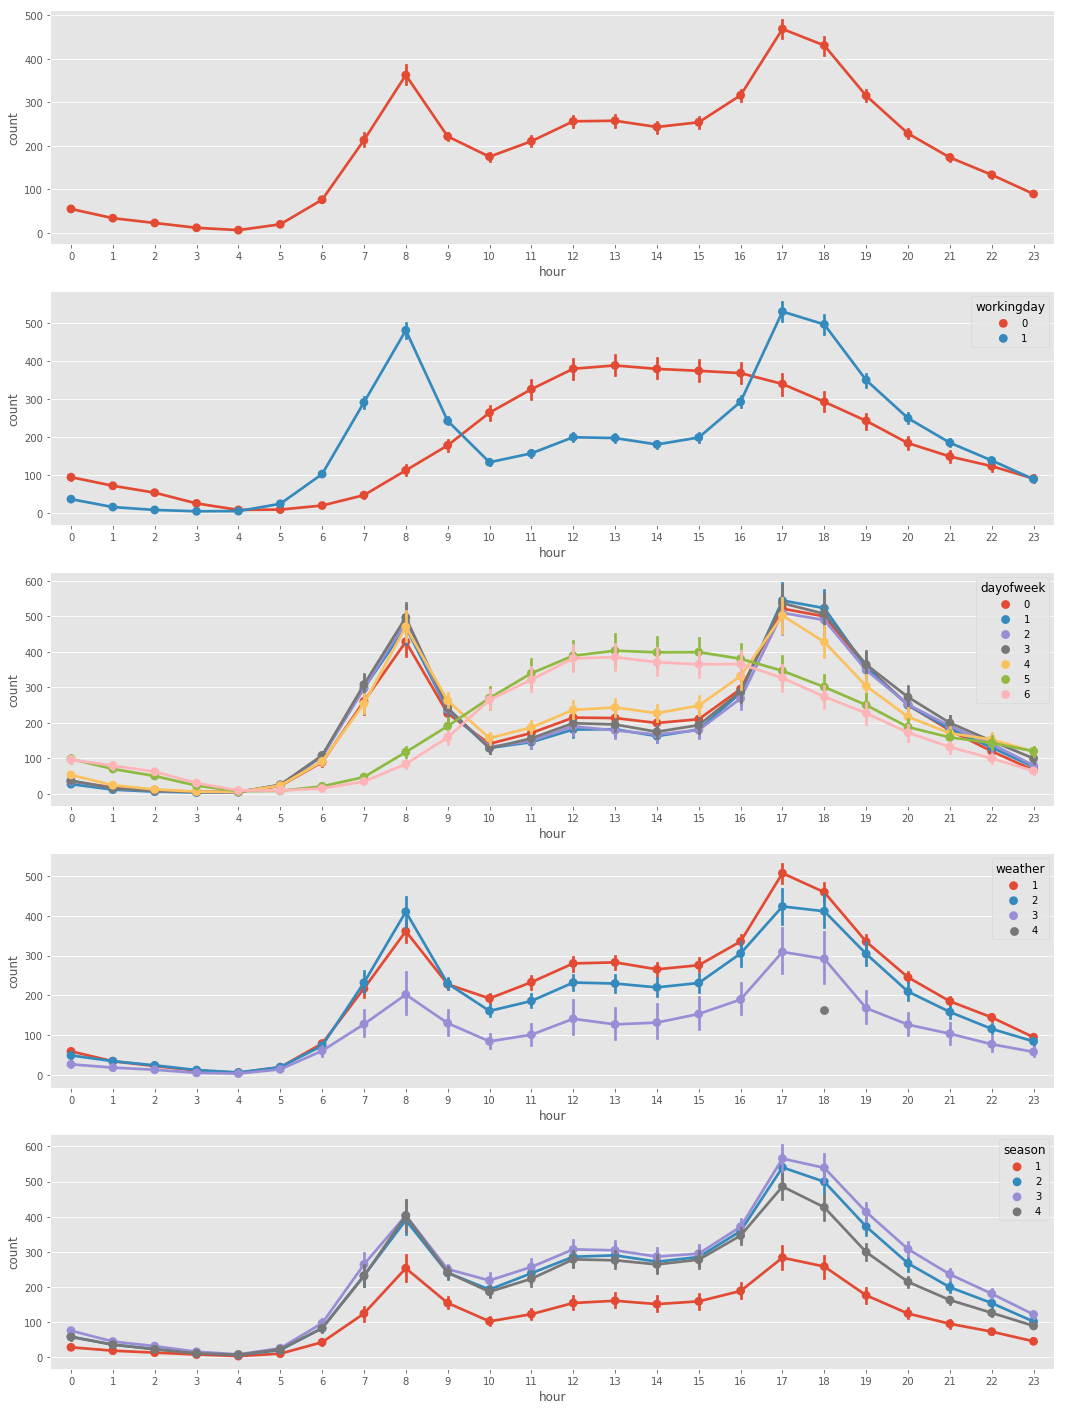

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18, 25)

sns.pointplot(data = train, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = train, x = "hour", y = "count", hue = "dayofweek", ax = ax3)
sns.pointplot(data = train, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = train, x = "hour", y = "count", hue = "season", ax = ax5)

In [19]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


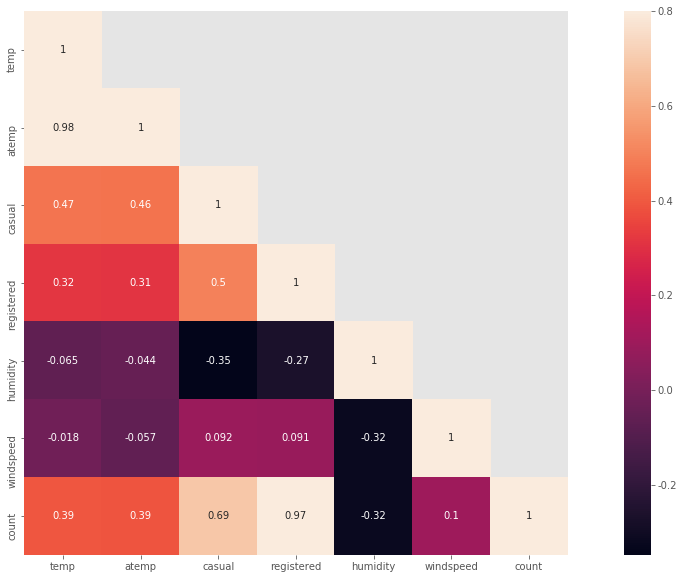

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask = mask, vmax =.8, square = True, annot = True)
# heatmap으로 그래프를 그려 상관관계 확인해보니, 온도 습도, 풍속은 상관관계가 거의 없다.

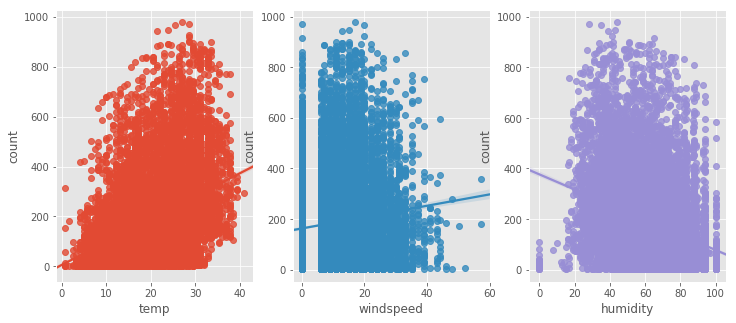

In [21]:
# 온도 풍속 습도에 따른 산점도 그려보기
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)

sns.regplot(x = "temp", y = "count", data = train, ax = ax1)
sns.regplot(x = "windspeed", y = "count", data = train, ax = ax2)
sns.regplot(x = "humidity", y = "count", data = train, ax = ax3)

# 풍속은 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해본다.

In [22]:
# 월별 데이터들을 모아보기, 년도 월을 붙인다.
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


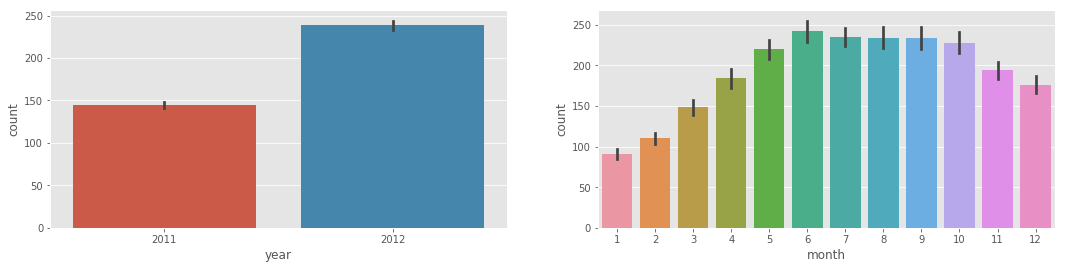

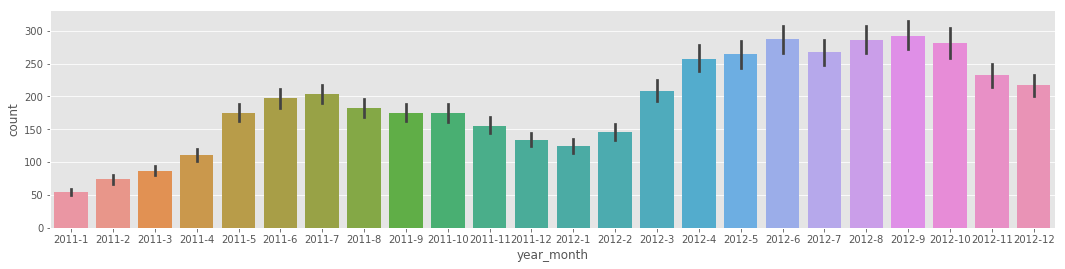

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year_month", y = "count", ax = ax3)

# 2011년보다 2012년의 대여량이 더 많고, 겨울보다는 여름이 대여량이 더 많다, 2011년과 2012년 월별데이터를 보면 증가하는 추세이다.

In [24]:
# train with out outliers
train_with_out_outliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"])]

print(train.shape)
print(train_with_out_outliers.shape)

(10886, 20)
(8001, 20)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.87120101, 3.87120101, 3.87120101, ..., 6.87523209, 6.87729607,
         6.88448665])),
 (0.6852593300227424, 5.313029676134487, 0.9926312252340196))

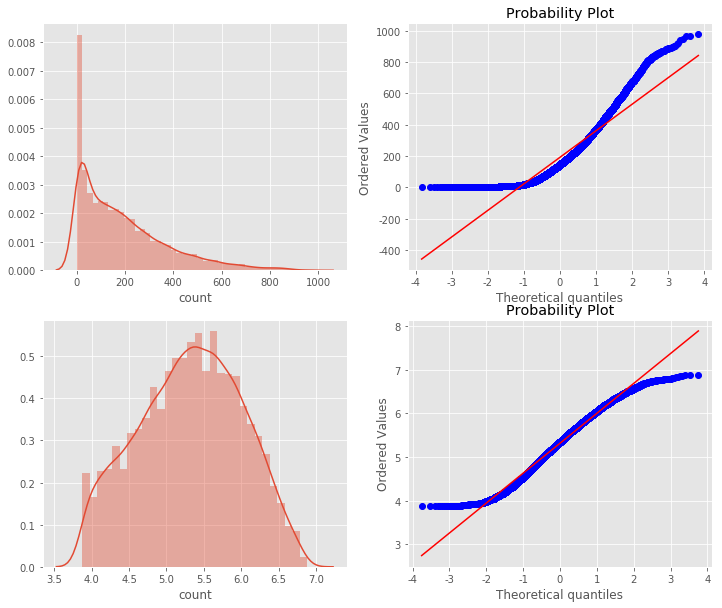

In [25]:
# count값의 데이터 분포도 파악하기
figure, axes = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist = 'norm', fit = True, plot = axes[0][1])
sns.distplot(np.log(train_with_out_outliers["count"]), ax = axes[1][0])
stats.probplot(np.log(train_with_out_outliers["count"]), dist = 'norm', fit = True, plot = axes[1][1])

# dist, prob으로 그린다. outliers을 제거해서

In [26]:
# 분류, 회귀, 차원축소 등
# 시계열 데이터에 따라 대여량 수요 예측한다. 램던포레스트를 풀어보기
# supervised machine learning 지도학습을 잘 설명해줌, 레이블 데이터가 있느냐 없느냐에 따라 지도학습과 비지도학습으로 나뉜다.
# clf = RandomForestClassifier(), clf.fit(x_train, y_train), y_pred = clf.predict(x_test), clf.score(x_test, y_test)
# decision tree는 최적화된 모델을 찾는 것이다. 속도가 빠르다는 장점이 있다
# overfitting and underfitting 과소적합은 너무 간단한 모델이 선택되어 데이터 특징과 다양성을 잡지 못함, 과대적합은 너무 복잡한 모델을 만들어 일반화 하기 어려움
# 최적점을 찾는 것이 중요하다, RMSLE의 평가방법을 사용한다. 
# RMSLE은 과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다. 오차를 제곱해서 평균한 값의 제곱근으로 값이 작을수록 정밀도가 높다. 0에 가까운 값이 나올수록 정밀도가 높은 값이다.
# RMSLE cost function을 살펴보기 
# 공식을 코드화하기

In [27]:
# 랜덤포레스트를 통해 수요 예측하기
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [28]:
train = pd.read_csv("bike_sharing_demand_train.csv", parse_dates = ["datetime"])
train.shape

(10886, 12)

In [29]:
test = pd.read_csv("bike_sharing_demand_test.csv", parse_dates = ["datetime"])
test.shape

(6493, 9)

In [30]:
# 칼럼을 담아주기, feature engineering
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [31]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

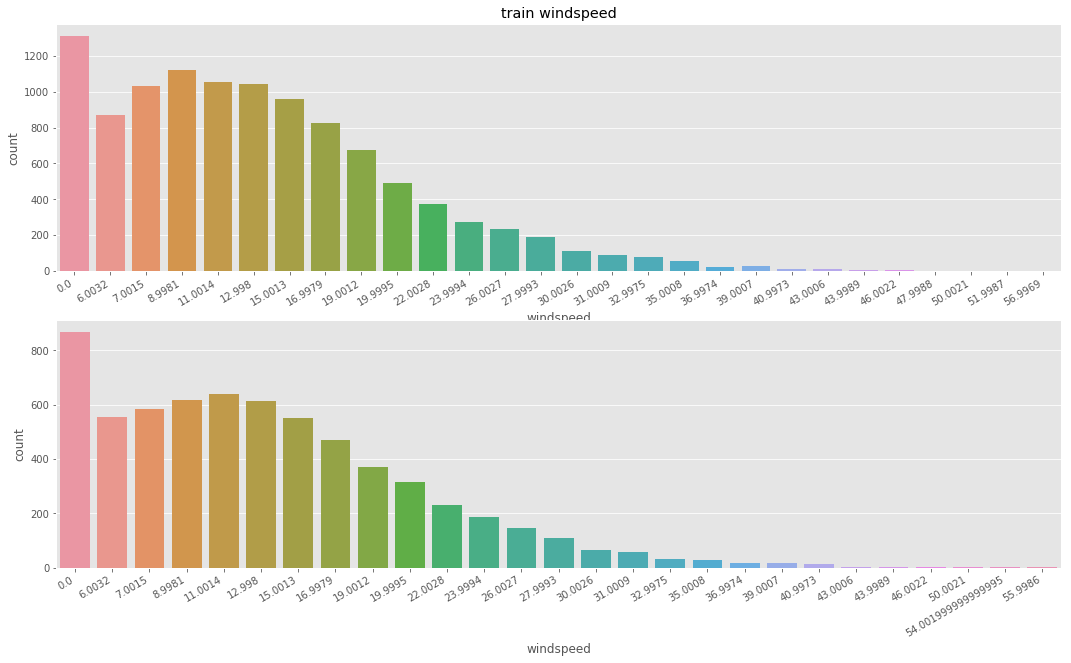

In [32]:
# windspeed 풍속에 0값이 가장 많다. 잘못 기록된 데이터를 고쳐줄 필요가 있다. 풍속데이터 시각화

fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18, 10)

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = "train windspeed")
sns.countplot(data = test, x = "windspeed", ax = axes[1])

In [33]:
# 풍속의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수 있지만, 예측의 정확동를 높이는데 도움이 안될꺼 같다.
# train.loc[train["windspeed"]] == 0, "windspeed"] = train["windspeed"].mean()
# test.loc[train["windspeed"]] == 0, "windspeed"] = test["windspeed"].mean()

In [34]:
# 풍속이 0인것과 아닌 것을 나누어 준다.
trainwind0 = train.loc[train['windspeed'] == 0]
trainwindNot0 = train.loc[train['windspeed'] !=0]
print(trainwind0.shape)
print(trainwindNot0.shape)

(1313, 19)
(9573, 19)


In [35]:
# 결국 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
  
  # 풍속이 0인것과 아닌 것을 나누어 준다.
  datawind0 = data.loc[data['windspeed'] == 0]
  datawindNot0 = data.loc[data['windspeed'] !=0]
  
  # 풍속을 예측할 피쳐를 선택한다.
  wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
  
  # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
  datawindNot0["windspeed"] = datawindNot0["windspeed"].astype("str")
  
  # 랜덤포레스트 분류기를 사용한다.
  rfModel_wind = RandomForestClassifier()
  
  # wCol에 있는 피쳐의 값을 바탕으로 풍속을 학습시킨다.
  rfModel_wind.fit(datawindNot0[wCol], datawindNot0["windspeed"])
  
  # 학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측한다.
  wind0values = rfModel_wind.predict(x = datawind0[wCol])
  
  # 값을 다 예측 후 비교해 보기 위해 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
  predictwind0 = datawind0
  predictwindNot0 = datawindNot0
  
  # 값이 0으로 기록된 풍속에 대해 예측한 값을 넣어준다.
  predictwind0["windspeed"] = wind0values
  
  # data_wsn_0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을  합쳐준다.
  data = predictwindNot0.append(predictwind0)
  
  # 풍속의 데이터타입을 float으로 지정해 준다.
  data["windspeed"] = data["windspeed"].astype("float")
  
  data.reset_index(inplace = True)
  data.drop('index', inplace = True, axis = 1)
  
  return data

In [45]:
# 0값을 조정한다. 트레인과 테스트를 나누어 점수를 내본다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# windspeed의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = "train windspeed")
sns.countplot(data = test, x = "windspeed", ax = ax1)

TypeError: predict() got an unexpected keyword argument 'x'

In [46]:
# feacture selection, 신호와 잡음을 구분하여야 함, 피쳐가 많다고 무조건 좋은 성능을 내지는 않는다.하나씩 제거하면서 성능이 좋지 않은 것은 제거한다.
# 연속형 feacutre와 범주형 feacture
# 연속형 feature = ["temp", "humidity", "windspeed", "atemp"]
# 범주형 feature의 type을 카테코리로 변경해 준다.
categorical_feature_names = ["season", "holiday", "workingday", "weather",
                             "dayofweek", "month", "year", "hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [47]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [48]:
# 새로운 데이터행렬 만들기
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,0.0,2011,0,5,0,0
1,1,1,9.02,13.635,80,0.0,2011,1,5,0,0
2,1,1,9.02,13.635,80,0.0,2011,2,5,0,0
3,1,1,9.84,14.395,75,0.0,2011,3,5,0,0
4,1,1,9.84,14.395,75,0.0,2011,4,5,0,0


In [49]:
x_test = test[feature_names]

print(x_test.shape)
x_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [50]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [51]:
# score는 RMSLE방법을 사용한다, 과대평가된 항목보다는 과소평가 된 항목에 패널티를 주고, 오차를 제곱해서 평균값의 제곱으로 값이 작을수록 정밀도가 높다
# 0에 가까운 값이 나올수록 정밀도가 높은 값이다.
# RMSLE 계산해보자
from sklearn.metrics import make_scorer

def rmsle(prdicted_values, actual_values):
  # 넘파이로 배열 형태로 바꿔준다.
  predicted_values = np.array(predicted_values)
  actual_values = np.array(actual_values)
  
  # 예측값과 실제값에 1을 더하고 로그를 씌워준다.
  log_predict = np.log(predicted_values + 1)
  log_actual = np.log(actual_values + 1)
  
  # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
  difference = log_predict - log_actual
  
  # difference = (log_predict - log_actual) ** 2
  difference = np.square(difference)
  
  # 평균을 낸다.
  mean_difference = difference.mean()
  
  # 다시 루트를 씌운다.
  score = np.sqrt(mean_difference)
  
  return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [52]:
# cross validation 교차검증 : 일반화 성능을 측정하기 위해 데이터를 여러 번 나누고 여러 모델을 학습한다.
# k-fold cross validation scheme 데이터를 폴드라 부르는 비슷한 크기의 부분으로 나누고 각 각의 폴드 정확도를 측정
# 첫 번째 폴드를 테스트 세트로 나머지 폴드를 훈련세트로 사용하여 학습, 나머지 훈련세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가
# 두 번째 폴드가 테스트 세트로 되고 나머지 폴드의 훈련세트를 두 번째 폴드로 정확도를 측정, 이 과정을 마지막 폴드까지 반복
# 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균 값을 낸게 정확도가 된다.

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [54]:
# 렌텀포레스트로 예측하기
# model = RandomForestRegressor, n_estimators = 100 사용함
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators = 100,
                             n_jobs = -1,
                             random_state = 0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [60]:

%time score = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("score = {0:.5f}".format(score))


UnboundLocalError: local variable 'predicted_values' referenced before assignment

NameError: name 'score' is not defined

In [61]:
# train 학습시킴, 피팅(옷을 맞출 떄 사용하는 피팅을 생각함) = 피쳐와 레이블을 넣어주면 알아서 학습을 함
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [62]:
# 예측하기
predictions = model.predict(x_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 11.48      ,   4.65      ,   4.18333333,   3.71      ,
         3.21      ,   6.53      ,  39.3       , 107.92      ,
       244.69      , 135.33      ])

[Text(0.5, 1.0, 'test')]

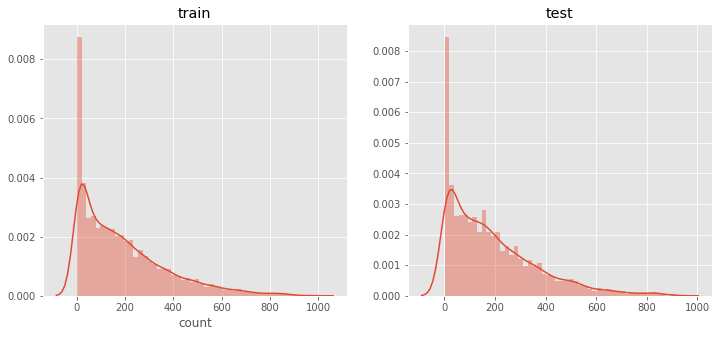

In [63]:
# 예측한 데이터 시각화하기
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")

sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

In [64]:
# submit 
submission = pd.read_csv("bike_sharing_demand_sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.480000
1,2011-01-20 01:00:00,4.650000
2,2011-01-20 02:00:00,4.183333
3,2011-01-20 03:00:00,3.710000
4,2011-01-20 04:00:00,3.210000


In [66]:
submission.to_csv("score_{0:.5f}_bike_sharing_sampleSubmission.csv".format(score), index = False)

NameError: name 'score' is not defined

In [0]:
# 3. 머신러닝 선형회귀, 릿지, 랏쏘로 평가해보기




import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# 그래프를 그리기 위해
%matplotlib inline
# ggplot 스타일을 사용하여 격자로 숫자 범위가 잘 보이도록 함
plt.style.use('ggplot')
# 폰트가 꺠지는 문제 마이너스로 대처
mpl.rcParams['axes.unicode_minus'] = False

In [0]:
train = pd.read_csv("bike_sharing_demand_train.csv", parse_dates = ["datetime"])
train.shape

(10886, 12)

In [0]:
test = pd.read_csv("bike_sharing_demand_test.csv", parse_dates = ["datetime"])
test.shape

(6493, 9)

In [0]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 16)

In [0]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

In [0]:
# 연속형 feacutre와 범주형 feacture
# 연속형 feature = ["temp", "humidity", "windspeed", "atemp"]
# 범주형 feature의 type을 카테코리로 변경해 준다.
categorical_feature_names = ["season", "holiday", "workingday", "weather",
                             "dayofweek", "month", "year", "hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [0]:
feature_names = ["season", "weather", "temp", "atemp", "humidity","year", 
                 "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [0]:
# 새로운 데이터행렬 만들기
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [0]:
x_test = test[feature_names]

print(x_test.shape)
x_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [0]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [0]:
# RMSLE
from sklearn.metrics import make_scorer

def rmsle(prdicted_values, actual_values, convertExp = True):
  
    if convertExp:
      predicted_values = np.exp(predicted_values),
      actual_values = np.exp(actual_values)
      
      
      # numpy로 배열 형태로 바꿔준다.
      predicted_values = np.array(predicted_values)
      actual_values = np.array(actual_values)
      
      # 예측값과 실제값에 1을 더하고 로그를 씌워준다.
      log_predict = np.log(predicted_values + 1)
      log_actual = np.log(actual_values + 1)
      
      # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
      difference = log_predict - log_actual
      difference = np.square(difference)
      
      # 평균을 낸다.
      mean_difference = difference.mean()
      
      # 다시 루트를 씌운다.
      score = np.sqrt(mean_difference)
      
      return score

In [0]:
# 선형회귀모델(linear regression model) 예측과 훈련 세트에 있어 타킷 y 사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
# 매개편수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.
# 선형회귀를 이용하여 모델을 만들어서 학습을 시키고

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# 경고 메세지 숨기거나 무시할 떄 사용
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category = DeprecationWarning)

# 선형회귀  모델을 초기화하기
lModel = LinearRegression()

# 모델을 학습시키기
y_train_log = np.log1p(y_train)
lModel.fit(x_train, y_train_log)

# 예측하고 정확도를 평가하기
preds = lModel.predict(x_train)
print("RMSLE Value For Linear Regression: ",
      rmsle(np.exp(y_train_log), np.exp(preds), False))

RMSLE Value For Linear Regression:  None


In [0]:
# 릿지 Regilarization Model Ridge - 회귀를 위한 선형모델, 가중치(w)를 모든 원소가 0에 가깝게 만들어 모든 피쳐가 주는 영향을 최소화
# Regularzation(규제)는 오버피팅(과대적합)이 되지 않도록  모델을 강제로 제한한다는 것이다.
# 반복 실행 횟수(max_iter)는 3000을 넣어주었다, GridSearchCV를 통해 알파값을
ridge_m_ = Ridge()
ridge_params_ =  {'max_iter': [3000], 'alpha': [0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV(ridge_m_,
                       ridge_params_,
                        scoring = rmsle_scorer,
                        cv = 5)

# np.log1p에서 뒷 글자 중 1p는 숫자 1를 의미한다. 알파벳과 l과 헷갈릴 수 있으니 주의하자.
y_train_log  =  np.log1p(y_train)
grid_ridge_m.fit(x_train, y_train_log)
preds = grid_ridge_m.predict(x_train)
print(grid_ridge_m.best_params_)
print("RESLE value For Ridge  Regression: ", rmsle(np.exp(y_train_log),np.exp(preds),  False))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

plt.xticks(rotation = 30, ha = 'right')
sns.pointplot(data = df, x = 'alpha', y = "rmsle", ax = ax)

global predicted_values

UnboundLocalError: ignored

In [0]:
# lasso 모델을 가지고
# 선형회귀의 규제를 적용하는 대안, 계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피쳐가 생긴다는 것이다.
# 피쳐 선택이 자동으로 이루어진다고도 볼 수 있다.
# alpha 값의 기본은 1.0이며,  과소 적합을 줄이기 위해서는 이 값을 줄어야 한다. 그리드 서치로 아래 라쏘모델을 실행했을 떄 배스트 알파값은 0.0024
# max_iter 3000을 넣어주었다.

lasso_m_ = Lasso()

alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ =  {'max_iter': [3000], 'alpah': alpha}

grid_lasso_m = GridSearchCV( lasso_m_,
                       lasso_params_,
                        scoring = rmsle_scorer,
                        cv = 5)
y_train_log  =  np.log1p(y_train)
grid_lasso_m.fit( x_train, y_train_log )
preds=grid_lasso_m.predict(x_train)
print(grid_lasso_m.best_params_)
print("RESLE value For Lasso  Regression: ", rmsle(np.exp(y_train_log),np.exp(preds),  False))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

plt.xticks(rotation = 30, ha = 'right')
sns.pointplot(data = df, x = 'alpha', y = "rmsle", ax = ax)

ValueError: ignored

In [0]:
# 앙상블모델 - 랜덤포레스트 estimators값은 100으로 설정함
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators = 100)

y_train_log = np.log1p(y_train)
rfModel.fit(x_train, y_train_log)

preds = rfModel.predict(x_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
#print("RESLE value For Random  Forest: ", rmsle(np.exp(y_train_log),np.exp(preds),  False))
print("RESLE value For Random  Forest: ", score)

RESLE value For Random  Forest:  None


In [0]:
# ensemble model gradient boost 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법, 회귀와 분류에 모두 사용할 수 있음
# 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦, 무작위성이 없고 강력한 사전 가지치기가 사용됨
# 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름, learning_rate 오차를 얼마나 강하게 보정할 것인지를 제어
# n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 과대적합이 될 수 있음
# maz_depth(maz_leaf_noddes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01);

y_train_log = np.log1p(y_train)
gbm.fit(x_train, y_train_log)

preds = gbm.predict(x_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print("RESLE Value For Gradient Boost:", score)

RESLE Value For Gradient Boost: None


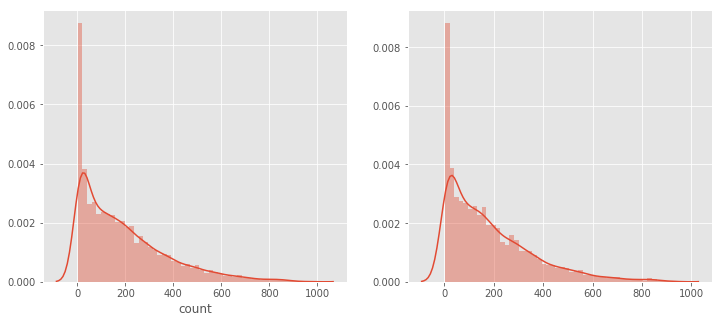

In [0]:
#
predsTest = rfModel.predict(x_test)
fig, (ax1,ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
sns.distplot(np.exp(predsTest), ax = ax2, bins = 50)

In [0]:
# submit
submission = pd.read_csv("bike_sharing_demand_sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.391253
1,2011-01-20 01:00:00,5.351272
2,2011-01-20 02:00:00,3.771495
3,2011-01-20 03:00:00,4.924610
4,2011-01-20 04:00:00,3.984175


In [1]:
submission.to_csv("score_{0:.5f}_bike_sharing_demend_sampleSubmission.csv".format(score), index = False)

NameError: name 'submission' is not defined

In [37]:
!pip install git+https://github.com/keras-team/keras.git

  Cloning https://github.com/keras-team/keras.git to /private/var/folders/wj/71kkv3rd6fq495jxgkr4kwb40000gn/T/pip-req-build-50ppfxti
  Running command git clone -q https://github.com/keras-team/keras.git /private/var/folders/wj/71kkv3rd6fq495jxgkr4kwb40000gn/T/pip-req-build-50ppfxti
  Created wheel for Keras: filename=Keras-2.2.4-cp36-none-any.whl size=336023 sha256=860bb1678180b40088dc62a1d7fe91f50963760ebb1ba0785b621d79feebad83
  Stored in directory: /private/var/folders/wj/71kkv3rd6fq495jxgkr4kwb40000gn/T/pip-ephem-wheel-cache-gevgy2wr/wheels/da/a4/7e/6b7bd9af18cc2e23b8dd5ed6de07a7e13bd80a17214eb88932
Successfully built Keras
